In [73]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from matplotlib import cm, colors


## Find the minima of the function
$f(x) = (x-0.4)^3 + (x-0.1)^2-x +0.5$

At what value of x is f(x) minimum?

In [74]:
def func(x):
    return (x - 0.4)**3 + (x-0.1)**2 -x + 0.5

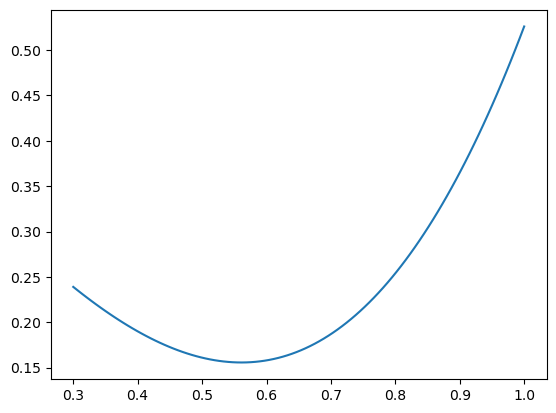

In [75]:
x = np.linspace(0.3,1,100)
plt.plot(x,func(x))

In [78]:
result = sp.optimize.minimize(func,0.3,method='BFGS')

In [79]:
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.15569427153280513
        x: [ 5.611e-01]
      nit: 4
      jac: [-2.541e-06]
 hess_inv: [[ 3.349e-01]]
     nfev: 12
     njev: 6


## Find the minima of the function
$f(x,y) = (x-0.4)^2 + (y-0.1)^2-x-2y +0.5$

At what value of x is f(x) minimum?

In [6]:
def func2d(x,y):
    return (x - 0.4)**2 + (y-0.1)**2 -x -2*y + 0.5

In [7]:
result = sp.optimize.minimize(func2d,0,0)

In [8]:
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.1399999999999999
        x: [ 9.000e-01]
      nit: 2
      jac: [ 0.000e+00]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3


# Interpolation

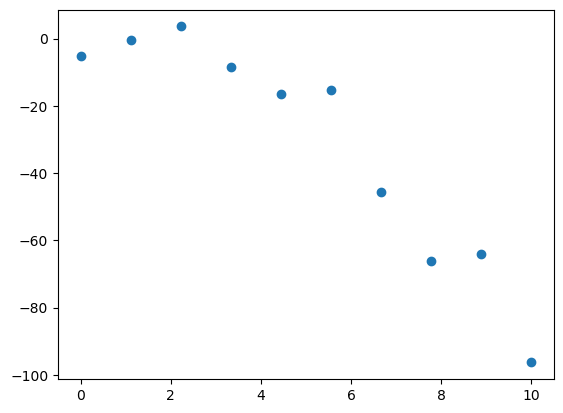

In [81]:
x = np.linspace(0,10,10)
data = 6*np.random.randn(10) - (x-0.5)**2
plt.scatter(x,data)

In [82]:
f = sp.interpolate.interp1d(x,data,kind='linear')

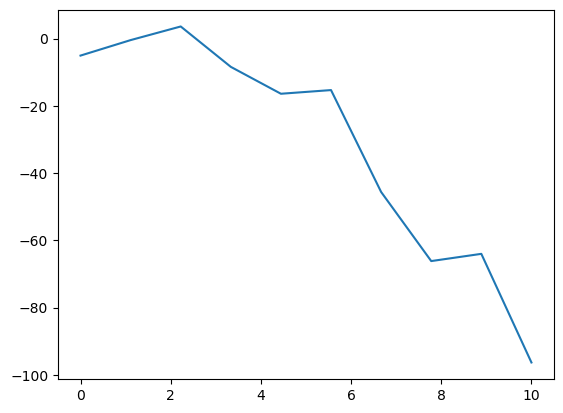

In [83]:
plt.plot(x,f(x))

In [84]:
f = sp.interpolate.interp1d(x,data,kind='quadratic')

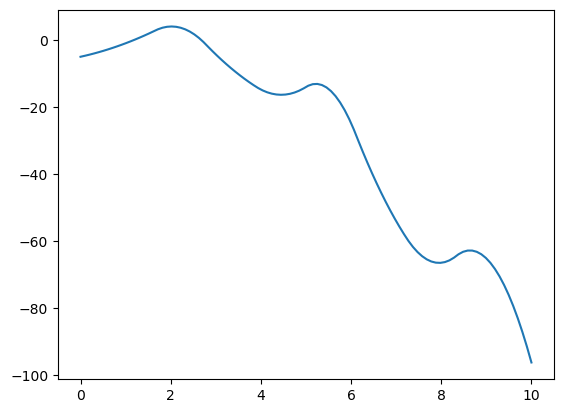

In [85]:
plt.plot(np.linspace(0,10,100),f(np.linspace(0,10,100)))

# Quantum Harmonic Oscillator

- The **eigenfunctions** of HO are expressed in terms of Hermite polynomials $H_v(x)$, special functions well known in mathematical physics. 

$$\psi(x) = N_v \cdot H_v(x) \cdot e^{-x^2/2}$$

- The $N_v = (\sqrt{\pi} 2^v v!)^{-1/2}$ is a **normalization factor.**

- The **eigenvalues** are a simple function of quantum number v:

$$E(v)= h\nu \Big (v+\frac{1}{2}\Big)$$

### Hermite polynomials

- Definition:

$$H_v(x) = (-1)^v (e^{x^2})\frac{d^v}{dx^v} (e^{-x^2})$$

- Recursion relation:

$$x H_v(x) = v H_{v-1}+\frac{1}{2} H_{v+1}(x)$$

| Table of first eight of Hermite polynomials $H_v(x)$ |
| :--------------------------------------------------: |
|                       $H_0=1$                        |
|                       $H_1=2x$                       |
|                     $H_2=4x^2-2$                     |
|                    $H_3=8x^3-12$                     |
|                 $H_4=16x^4-48x^2+12$                 |
|               $H_5=32x^5-160x^3+120 x$               |
|            $H_6=64x^6-480x^4+720 x^2-120$            |
|         $H_7=128x^7-1344 x^5+3360 x^3-1680x$         |

In [86]:
H6 = sp.special.hermite(6)

In [88]:
print(H6)

    6       4             3       2
64 x - 480 x + 2.274e-13 x + 720 x + 7.105e-15 x - 120


Text(0, 0.5, '$H_n(x)$')

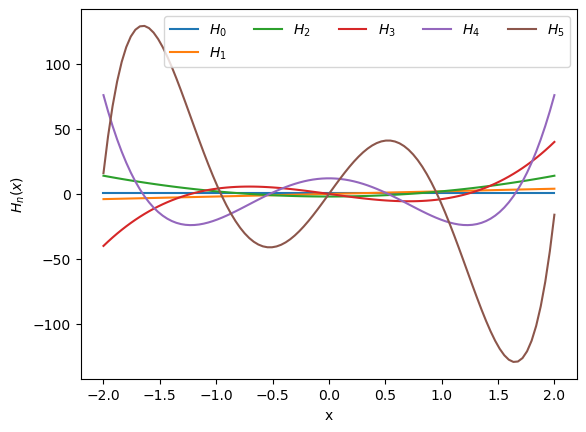

In [89]:
x=np.linspace(-2,2,100) # Range needs to be specified for plotting functions of x

for n in range(0,6):
    
    H=sp.special.hermite(n)
    
    f=H(x)
    
    plt.plot(x,f,label=f'$H_{n}$')
plt.legend(ncols=5)
plt.xlabel('x')
plt.ylabel(r'$H_n(x)$')

### Harmonic Oscillator wave functions



$$\psi_v(x) = N_v H_v(x) e^{-x^2/2} $$

In [90]:
import math 

In [92]:
def harmonic_wavefunc(n, x, k =1):
    hbar, m_e = 1, 1
    
    # Define omega from spring constant
    omega = np.sqrt(k/m_e)  # Here we assume electron mass for simplicity
    
    # Define normalization constant
    alpha = np.sqrt(m_e * omega / hbar)
    normalization = np.sqrt(alpha / np.sqrt(np.pi) * (1.0 / (2**n * math.factorial(n))))
    
    # Compute the Hermite polynomial part
    herm_part = sp.special.hermite(n)(alpha * x)
    
    # Compute the exponential part
    exp_part = np.exp(-0.5 * (alpha * x)**2)
    
    return normalization * herm_part * exp_part

In [93]:
harmonic_wavefunc(n=1,  x=x)

array([-0.28752033, -0.3051723 , -0.32324217, -0.34167202, -0.36039681,
       -0.37934437, -0.39843548, -0.41758396, -0.43669692, -0.45567503,
       -0.47441291, -0.4927996 , -0.51071913, -0.52805113, -0.54467161,
       -0.56045375, -0.57526878, -0.58898698, -0.60147869, -0.61261539,
       -0.62227088, -0.63032239, -0.63665185, -0.64114704, -0.64370284,
       -0.64422241, -0.64261835, -0.63881384, -0.63274368, -0.62435528,
       -0.61360959, -0.60048184, -0.58496224, -0.56705657, -0.54678654,
       -0.52419011, -0.49932154, -0.47225144, -0.44306646, -0.411869  ,
       -0.37877666, -0.34392152, -0.30744932, -0.26951844, -0.23029881,
       -0.18997061, -0.14872291, -0.10675219, -0.06426078, -0.02145526,
        0.02145526,  0.06426078,  0.10675219,  0.14872291,  0.18997061,
        0.23029881,  0.26951844,  0.30744932,  0.34392152,  0.37877666,
        0.411869  ,  0.44306646,  0.47225144,  0.49932154,  0.52419011,
        0.54678654,  0.56705657,  0.58496224,  0.60048184,  0.61

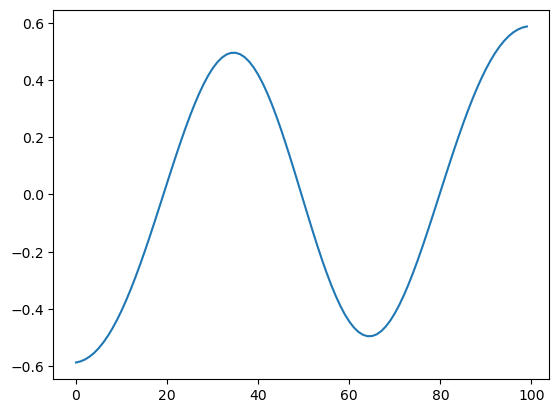

In [96]:
plt.plot(harmonic_wavefunc(n=3, x=x,k=1))

Text(0, 0.5, '$H_n(x)$')

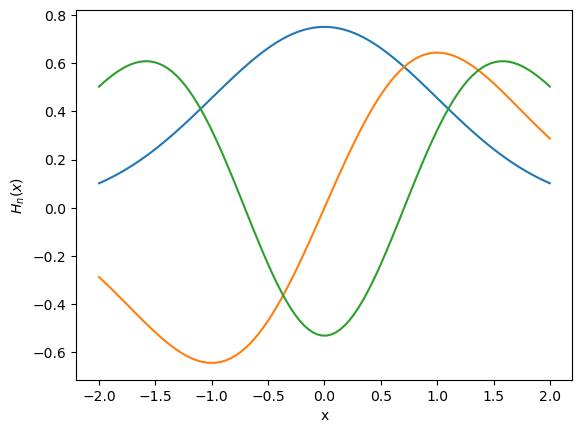

In [97]:
x=np.linspace(-2,2,100) # Range needs to be specified for plotting functions of x

for n in range(0,3):
    
    #H=sp.special.hermite(n)
    
    #f=H(x)
    
    plt.plot(x,harmonic_wavefunc(n, k=1, x=x))

plt.xlabel('x')
plt.ylabel(r'$H_n(x)$')

In [98]:
np.dot(harmonic_wavefunc(0, x=x,k=1),harmonic_wavefunc(1, x=x, k=1))

6.800116025829084e-16

In [99]:
# Normalization is computed by using numerical integration with trapezoidal method:

# remember that x runs form -inf to +inf so lets use large xmin and xmax
x=np.linspace(-10,10,1000)

psi2=harmonic_wavefunc(n=5, x=x, k=1)**2

Integral = sp.integrate.trapezoid(psi2, x)

print(Integral)

1.0000000000000009


In [102]:
def plot_wavefunc(k):

    hbar, m_e = 1, 1
    x = np.linspace(-2, 2, 1000)  # range of x values

    # Plot the potential
    V = 0.5 * k * x**2
    plt.plot(x, V, 'k-', label='Potential V(x)', linewidth=1.5)

    # Plotting the first three states
    for n in range(5):  

        psi          = harmonic_wavefunc(n, x, k)
        energy_level = 0.5 * hbar * np.sqrt(k/m_e) * (n + 0.5)

        plt.plot(x, psi + energy_level, label=f'n={n}')  # Offset each wavefunction for clarity
        
        # Plotting energy levels
        plt.axhline(energy_level, color='gray', linestyle='--', linewidth=0.8)
        plt.text(1.2, energy_level+0.2, fr"$E_{n}$")

    plt.legend()
    plt.title(f"Wavefunctions for different n with k={k} N/m")
    plt.xlabel("x (m)")
    plt.ylabel("Ψ(x)")
    plt.ylim(0, 5)
    plt.show()

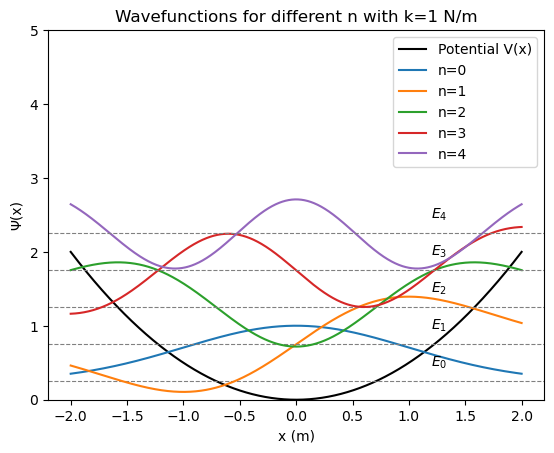

In [103]:
plot_wavefunc(1)

$$
Y_{lm}(\phi,\theta) = \sqrt{\frac{2l+1}{4\pi} \frac{(l-m)!}{(l+m)!} } P_{lm}(cos \phi) \cdot e^{im\theta}
$$



- **m array_like**
Order of the harmonic (int); must have |m| <= l.

- **l array_like**
Degree of the harmonic (int); must have l >= 0. 

- **$\theta$ array_like**
Azimuthal (longitudinal) coordinate; must be in $[0, 2\pi]$.

- **$\phi$ array_like**
Polar (colatitudinal) coordinate; must be in $[0, \pi]$.

In [104]:
# Create 2D grid of angular variables

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Convert to cartesian coordinates. r=const=1 for convenience
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

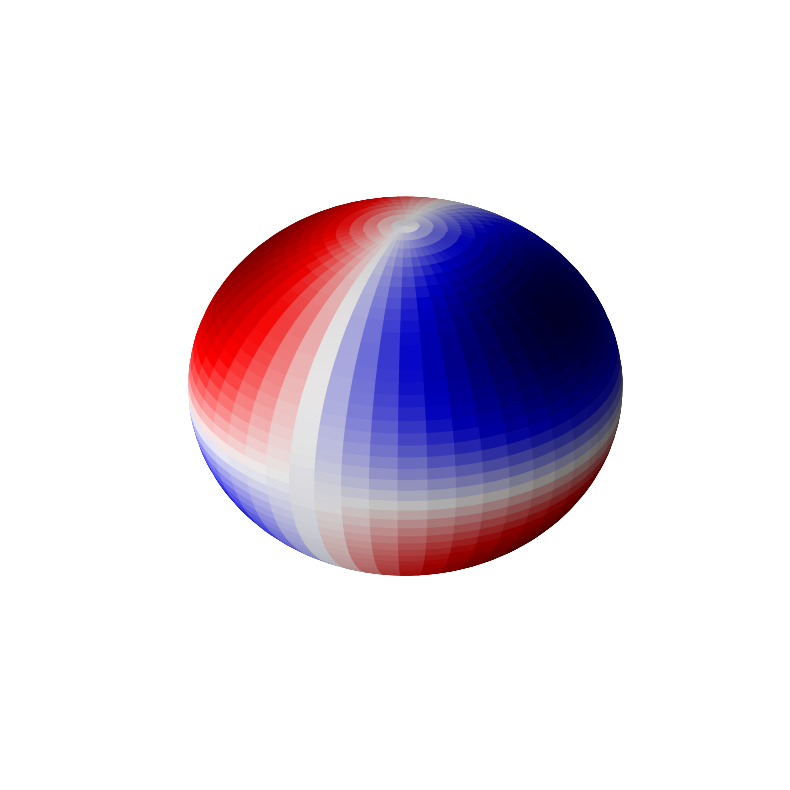

In [113]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

l, m = 2,1
Ylm  = sp.special.sph_harm(m, l, theta, phi).real

#normalize color to [0,1] corresponding to magnitude of spherical harmonic

fcolors = (Ylm - Ylm.min())/(Ylm.max() - Ylm.min()+0.01)

ax.plot_surface(x, y, z, facecolors=cm.seismic(fcolors))

# Turn off the axis planes
ax.set_axis_off()

# Fitting 

In [114]:
x_data = np.linspace(0, 10, 10)
y_data = 2*x_data**3 - 2*x_data + 0.01*np.random.randn(10)

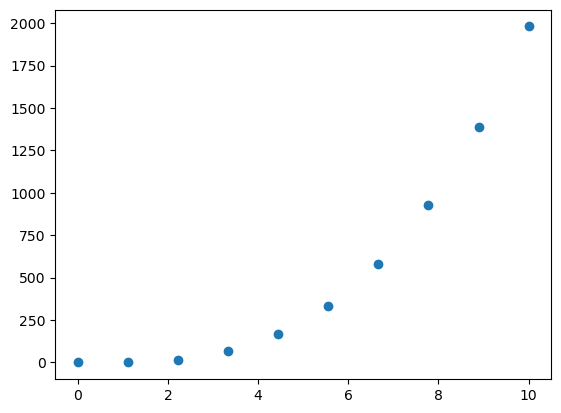

In [115]:
plt.scatter(x_data, y_data)

In [116]:
def poly_fn(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x +d

In [117]:
popt,pcov = sp.optimize.curve_fit(poly_fn,x_data,y_data,p0=(0,0,0,0))

In [118]:
popt

array([ 1.99991670e+00,  1.01582092e-03, -2.00153411e+00, -1.02107183e-03])

In [119]:
A,B,C,D = popt

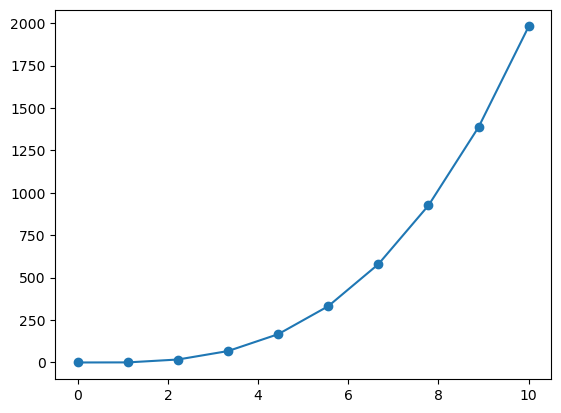

In [120]:
plt.scatter(x_data, y_data)
plt.plot(x_data, poly_fn(x_data,A,B,C,D))

# Differentiation with scipy
### we did some differentiation with numpy using np.grad()

In [121]:
def function3(x):
    return np.exp(-x/4)*np.cos(2*x)

In [122]:
x = np.linspace(0,10,100)


/tmp/ipykernel_3813/4259676546.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, sp.misc.derivative(function3, x, dx=1e-6))
/tmp/ipykernel_3813/4259676546.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, sp.misc.derivative(function3, x, dx=1e-6, n=2))


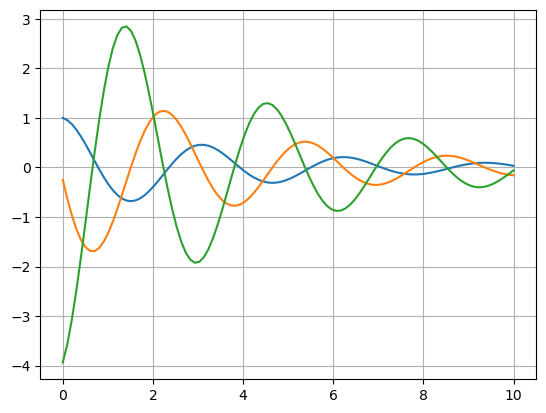

In [123]:
plt.plot(x, function3(x))
plt.plot(x, sp.misc.derivative(function3, x, dx=1e-6))
plt.plot(x, sp.misc.derivative(function3, x, dx=1e-6, n=2))
plt.grid()

# Integration

In [124]:
# Lets evaluate 2 D gaussian integral using scipy

In [125]:
def gauss2D(x,y):
    return np.exp(-x**2 -y**2)

In [127]:
def gauss1D(x):
    return np.exp(-x**2)

In [126]:
sp.integrate.dblquad(gauss2D, -np.inf,np.inf,-np.inf,np.inf )

(3.141592653589777, 2.5173086737433208e-08)

In [129]:
sp.integrate.quad(gauss1D, -np.inf, np.inf )

(1.7724538509055159, 1.4202636780944923e-08)

In [130]:
np.sqrt(np.pi)

1.7724538509055159